In [197]:
# Importing the libraries
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# from datetime import datetime
# from dateutil.parser import parse


In [198]:
# Reading the dataset
data = pd.read_csv("dog_breeds.csv")
data.head()

,Breed,type,score,popularity_ranking,intelligence,congential_ailments,score for kids,size,lifetime_cost,intelligence_rank,intelligence_percentage,longetive,number_of_genetic_ailments,genetic_ailments,purchase_price,food_costs_per_year,grooming_frequently,sustainable_for_children
0,Border Terrier,terrier,3.61,61,Above average,NaN,4.99,small,"$22,638",30,70%,14.00,0,NaN,$833,$324,Once a week,1
1,Cairn Terrier,terrier,3.53,48,Above average,"['lion jaw', 'heart problems']",4.91,small,"$21,992",35,61%,13.84,2,"['lion jaw', 'heart problems']",$435,$324,Once a week,1
2,Siberian Husky,working,3.22,16,Average,NaN,4.72,medium,"$22,049",45,45%,12.58,0,NaN,$650,$466,Once in a few weeks,1
3,Welsh Springer Spaniel,sporting,3.34,81,Above average,['hip problems'],4.71,medium,"$20,224",31,69%,12.49,1,['hip problems'],$750,$324,Once a week,1
4,English Cocker Spaniel,sporting,3.33,51,Excellent,NaN,4.70,medium,"$18,993",18,82%,11.66,0,NaN,$800,$324,Once a week,1


In [199]:
data.shape

(87, 18)

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Breed                       87 non-null     object 
 1   type                        87 non-null     object 
 2   score                       87 non-null     float64
 3   popularity_ranking          87 non-null     int64  
 4   intelligence                87 non-null     object 
 5   congential_ailments         65 non-null     object 
 6   score for kids              87 non-null     float64
 7   size                        87 non-null     object 
 8   lifetime_cost               87 non-null     object 
 9   intelligence_rank           87 non-null     int64  
 10  intelligence_percentage     87 non-null     object 
 11  longetive                   87 non-null     float64
 12  number_of_genetic_ailments  87 non-null     int64  
 13  genetic_ailments            65 non-nu

In [201]:
# Indien Missing values
total_null = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

print("Total records = ", data.shape[0])

missing_data = pd.concat([total_null, percent.round(2)], axis='columns', keys=['Total Missing','In Percent'])
missing_data

Total records =  87


,Total Missing,In Percent
congential_ailments,22,25.29
genetic_ailments,22,25.29
Breed,0,0.00
intelligence_percentage,0,0.00
grooming_frequently,0,0.00
food_costs_per_year,0,0.00
purchase_price,0,0.00
number_of_genetic_ailments,0,0.00
longetive,0,0.00
intelligence_rank,0,0.00


Laten we de lege values, oftewel, degene zonder ailments. Vervangen door simpelweg een lege list.

In [202]:
data['congential_ailments'] = data['congential_ailments'].replace(np.nan, "[]")
data['genetic_ailments'] = data['genetic_ailments'].replace(np.nan, "[]")
data.head()

,Breed,type,score,popularity_ranking,intelligence,congential_ailments,score for kids,size,lifetime_cost,intelligence_rank,intelligence_percentage,longetive,number_of_genetic_ailments,genetic_ailments,purchase_price,food_costs_per_year,grooming_frequently,sustainable_for_children
0,Border Terrier,terrier,3.61,61,Above average,[],4.99,small,"$22,638",30,70%,14.00,0,[],$833,$324,Once a week,1
1,Cairn Terrier,terrier,3.53,48,Above average,"['lion jaw', 'heart problems']",4.91,small,"$21,992",35,61%,13.84,2,"['lion jaw', 'heart problems']",$435,$324,Once a week,1
2,Siberian Husky,working,3.22,16,Average,[],4.72,medium,"$22,049",45,45%,12.58,0,[],$650,$466,Once in a few weeks,1
3,Welsh Springer Spaniel,sporting,3.34,81,Above average,['hip problems'],4.71,medium,"$20,224",31,69%,12.49,1,['hip problems'],$750,$324,Once a week,1
4,English Cocker Spaniel,sporting,3.33,51,Excellent,[],4.70,medium,"$18,993",18,82%,11.66,0,[],$800,$324,Once a week,1


In [203]:
# Indien duplicate values

duplicates = data[data.duplicated()]

duplicates

,Breed,type,score,popularity_ranking,intelligence,congential_ailments,score for kids,size,lifetime_cost,intelligence_rank,intelligence_percentage,longetive,number_of_genetic_ailments,genetic_ailments,purchase_price,food_costs_per_year,grooming_frequently,sustainable_for_children


Opnieuw, geen duplicates. Anders kon je de dubbels verwijderen doormiddle van deze functie;


In [204]:
data = data.drop_duplicates()

data

# Pas als het ware data aan naar een dubbelloze versie

,Breed,type,score,popularity_ranking,intelligence,congential_ailments,score for kids,size,lifetime_cost,intelligence_rank,intelligence_percentage,longetive,number_of_genetic_ailments,genetic_ailments,purchase_price,food_costs_per_year,grooming_frequently,sustainable_for_children
0,Border Terrier,terrier,3.61,61,Above average,[],4.99,small,"$22,638",30,70%,14.00,0,[],$833,$324,Once a week,1
1,Cairn Terrier,terrier,3.53,48,Above average,"['lion jaw', 'heart problems']",4.91,small,"$21,992",35,61%,13.84,2,"['lion jaw', 'heart problems']",$435,$324,Once a week,1
2,Siberian Husky,working,3.22,16,Average,[],4.72,medium,"$22,049",45,45%,12.58,0,[],$650,$466,Once in a few weeks,1
3,Welsh Springer Spaniel,sporting,3.34,81,Above average,['hip problems'],4.71,medium,"$20,224",31,69%,12.49,1,['hip problems'],$750,$324,Once a week,1
4,English Cocker Spaniel,sporting,3.33,51,Excellent,[],4.70,medium,"$18,993",18,82%,11.66,0,[],$800,$324,Once a week,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Alaskan Malamute,working,1.82,47,Average,"['hip problems', 'dwarfism']",2.57,large,"$21,986",50,36%,10.67,2,"['hip problems', 'dwarfism']","$1,210",$710,Daily,2
83,Bloodhound,hound,1.66,42,Lowest,"['fatal stomach bloat', 'skin problems']",2.54,large,"$13,824",75,7%,6.75,2,"['fatal stomach bloat', 'skin problems']",$608,$710,Once a week,2
84,Chow Chow,non-sporting,1.76,54,Lowest,"['eye problems', 'hip problems']",2.51,medium,"$15,898",77,5%,9.01,2,"['eye problems', 'hip problems']",$515,$466,Daily,2
85,Akita,working,1.95,41,Average,['hip problems'],2.33,large,"$20,994",54,31%,10.16,1,['hip problems'],"$1,202",$710,Once a week,3


In het geval dat je te maken krijgt met iets van DateTimes als strings, zet je deze beter om tot DateTimes ipv strings. Dit zodat je je data kan vergelijken met elkaar. (Later, vroeger, etc)
Dit doe je als volgt:

In [205]:
# # Make een datetime object, met de huidige tijd. Om te voorkomen dat er geen errors gethrowed zullen
# # worden bij het parsen van datums die geen functies afhankelijk zijn van de now date van wanneer de
# # databank oorspronkelijk gemaakt is.
# dt = datetime.now()
# # convert the datetime object to a string
# dt_str = dt.strftime('%b %d, %Y')
# # replace the TBD dates to the current date string  (TBD = To be determined)
# data['Release Date'] = data['Release Date'].str.replace('releases on TBD', dt_str )

In [206]:
# # Vervolgs doe je het volgende:
# # convert the date column to a datetime object
# data['Release Date'] = pd.to_datetime(data['Release Date'])

# # add columns for Day, Month, and Year based on the Release Date Column data
# data['Day'] = data['Release Date'].dt.day
# data['Month'] = data['Release Date'].dt.strftime('%b')
# data['Year'] = data['Release Date'].dt.year

# # add a Week Day column with the day of the week that the game was released on
# data['Week day'] = data['Release Date'].dt.day_name()

Stel dat je bepaalde types wilt aanpassen, zodat je deze kan gebruiken bij het bepaalde berekeningen. Neem in ons voorbeeld de prijzen.

In [207]:
# Doe dat dan simpelweg door bepaalde dingen te replace en ze te parsen.

data['lifetime_cost'] = data['lifetime_cost'].astype(str).str.replace('$', '').str.replace(',', '').astype(int)
data['purchase_price'] = data['purchase_price'].astype(str).str.replace('$', '').str.replace(',', '').astype(int)
data['food_costs_per_year'] = data['food_costs_per_year'].astype(str).str.replace('$', '').str.replace(',', '').astype(int)
data['intelligence_percentage'] = data['intelligence_percentage'].astype(str).str.replace('%', '').astype(int)


data.head()

,Breed,type,score,popularity_ranking,intelligence,congential_ailments,score for kids,size,lifetime_cost,intelligence_rank,intelligence_percentage,longetive,number_of_genetic_ailments,genetic_ailments,purchase_price,food_costs_per_year,grooming_frequently,sustainable_for_children
0,Border Terrier,terrier,3.61,61,Above average,[],4.99,small,22638,30,70,14.00,0,[],833,324,Once a week,1
1,Cairn Terrier,terrier,3.53,48,Above average,"['lion jaw', 'heart problems']",4.91,small,21992,35,61,13.84,2,"['lion jaw', 'heart problems']",435,324,Once a week,1
2,Siberian Husky,working,3.22,16,Average,[],4.72,medium,22049,45,45,12.58,0,[],650,466,Once in a few weeks,1
3,Welsh Springer Spaniel,sporting,3.34,81,Above average,['hip problems'],4.71,medium,20224,31,69,12.49,1,['hip problems'],750,324,Once a week,1
4,English Cocker Spaniel,sporting,3.33,51,Excellent,[],4.70,medium,18993,18,82,11.66,0,[],800,324,Once a week,1


Descriptive Statistics

In [208]:
data.describe()

,score,popularity_ranking,score for kids,lifetime_cost,intelligence_rank,intelligence_percentage,longetive,number_of_genetic_ailments,purchase_price,food_costs_per_year,sustainable_for_children
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,2.603678,44.000000,3.681839,19875.839080,41.540230,50.206897,11.117701,1.689655,853.540230,489.597701,1.540230
std,0.570288,25.258662,0.655736,2988.769576,21.979803,29.037721,1.938465,1.707101,373.861864,204.266894,0.678655
min,0.990000,1.000000,1.860000,13479.000000,1.000000,1.000000,6.290000,0.000000,288.000000,270.000000,1.000000
25%,2.185000,22.500000,3.180000,17988.000000,27.000000,25.000000,10.000000,0.500000,611.500000,324.000000,1.000000
50%,2.710000,44.000000,3.810000,20087.000000,43.000000,49.000000,11.560000,1.000000,810.000000,466.000000,1.000000
75%,3.035000,65.500000,4.115000,21641.500000,59.000000,75.000000,12.430000,2.000000,1036.500000,466.000000,2.000000
max,3.640000,87.000000,4.990000,26686.000000,80.000000,100.000000,16.500000,9.000000,2680.000000,1349.000000,3.000000


Text variables

Als bepaalde vakken meerdere values kunnen hebben zet je deze best in een list.

In [209]:
data['congential_ailments'] = data['congential_ailments'].apply(lambda x: ast.literal_eval(x)) # maakt van list tussen " " een daadwerkelijke list.
data['genetic_ailments'] = data['genetic_ailments'].apply(lambda x: ast.literal_eval(x))

df_team = pd.DataFrame({
    'Breed': data['Breed'].tolist(),
    'congential_ailments': data['congential_ailments'].tolist(),
})

df_team = df_team.explode('congential_ailments')
df_team = df_team[df_team['congential_ailments'].notna() & (df_team['congential_ailments'] != '')]
df_team

,Breed,congential_ailments
1,Cairn Terrier,lion jaw
1,Cairn Terrier,heart problems
3,Welsh Springer Spaniel,hip problems
5,Cocker Spaniel,eye problems
5,Cocker Spaniel,skin problems
...,...,...
85,Akita,hip problems
86,Bulldog,breathing
86,Bulldog,hip problems
86,Bulldog,heart problems


Data visualisation

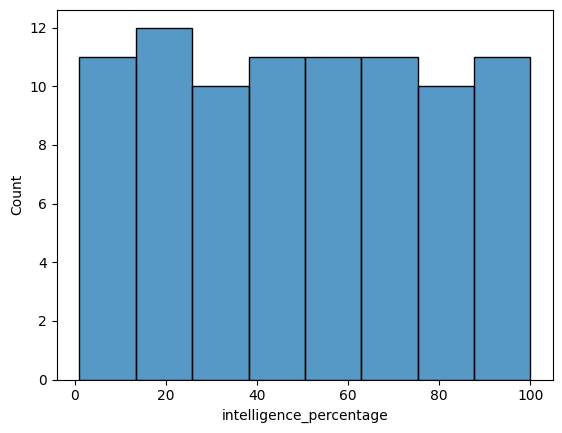

In [210]:
# highest_intelligence = data[['Breed', 'intelligence_percentage']].sort_values(by= 'intelligence_percentage', ascending= False)
# highest_intelligence
# Showing this in a graph:

sns.histplot(data= data['intelligence_percentage'])
plt.show()

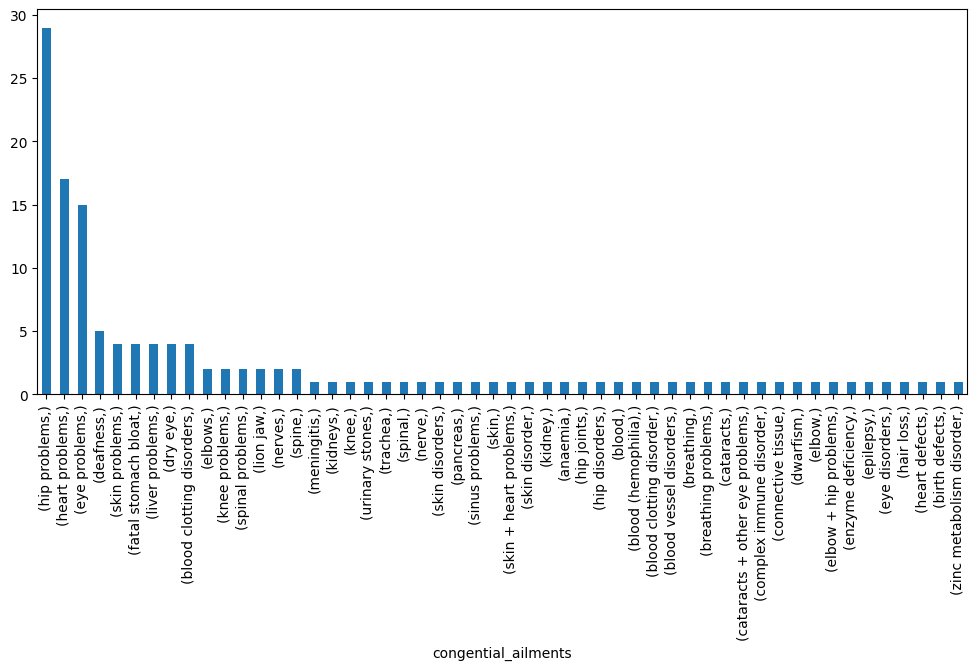

In [211]:
list_genres = pd.DataFrame(df_team['congential_ailments'])

count_genres = list_genres.value_counts().plot(kind='bar', figsize=(12, 5))

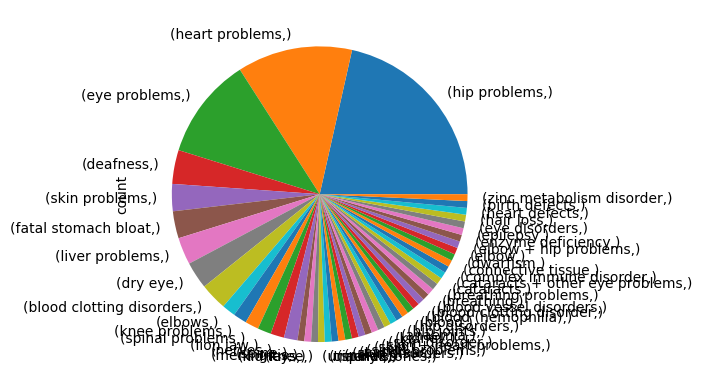

In [212]:
count_genres = list_genres.value_counts().plot(kind='pie')

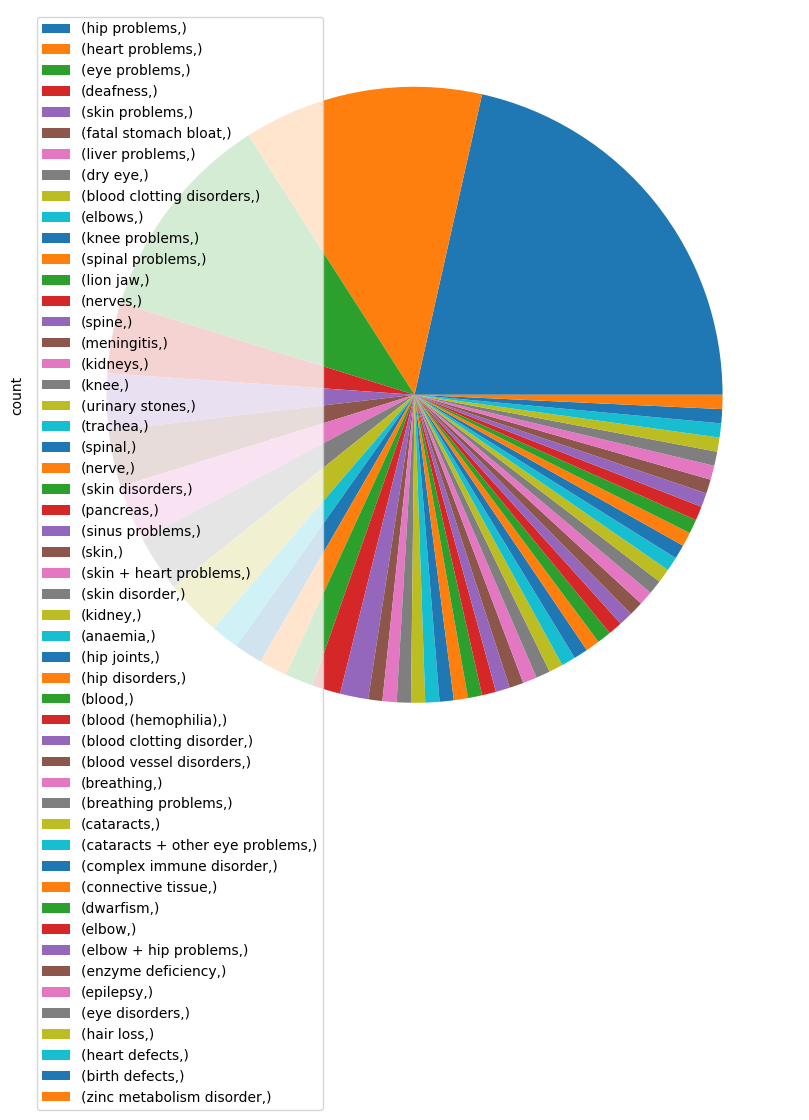

In [213]:
# Obviously this is kinda messy, so you can choose to just the names in een legende:
genre_counts = pd.DataFrame(list_genres.value_counts().rename_axis('unique_values'))
genre_counts.plot(kind = 'pie', labels = None, y='count', figsize=(10, 10))

plt.show()


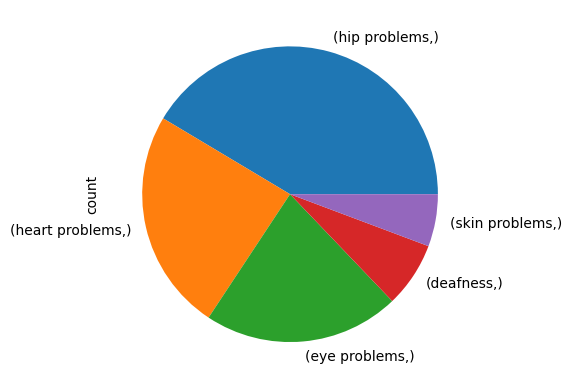

In [214]:
# Or just show the 5 biggest pieces of the pie:
shortlist_genres = pd.DataFrame(list_genres.value_counts().head(5))
shortlist_plot = list_genres.value_counts().head(5).plot(kind='pie')


Bivariate Analysis or Correlations

In [215]:
shortlist_genres

,count
congential_ailments,
hip problems,29
heart problems,17
eye problems,15
deafness,5
skin problems,4


In [216]:
has_ailment = pd.DataFrame({
    'Average life length if has ailment': data['longetive'].tolist(),
    'Congential Ailment': data['congential_ailments'].tolist(),
})

has_ailment = has_ailment.explode('Congential Ailment')
has_ailment = has_ailment[has_ailment['Congential Ailment'].notna() & (has_ailment['Congential Ailment'] != '')]

top5ailments = ["hip problems", "heart problems", "eye problems", "deafness", "skin problems"]

has_ailment = has_ailment.groupby('Congential Ailment')[['Average life length if has ailment']].mean().reset_index()
has_ailment = has_ailment.loc[has_ailment['Congential Ailment'].isin(top5ailments)]
has_ailment

,Congential Ailment,Average life length if has ailment
13,deafness,12.034000
22,eye problems,11.672000
26,heart problems,9.807059
29,hip problems,10.328966
45,skin problems,11.147500


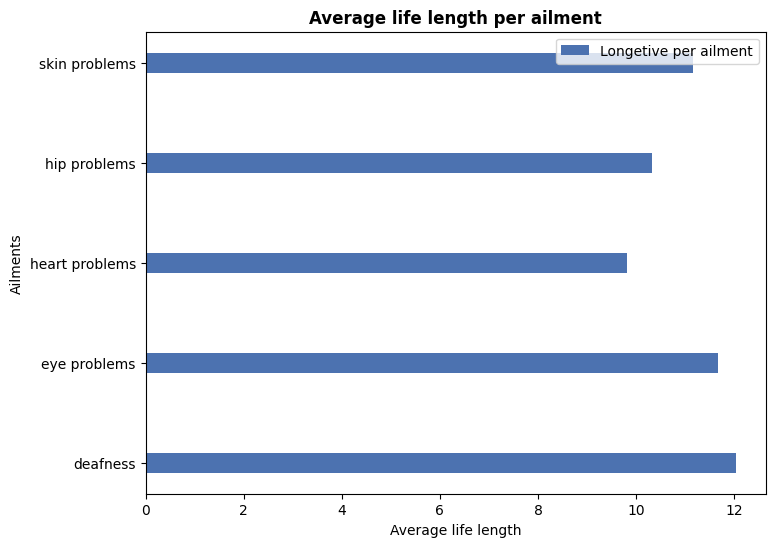

In [217]:
# Laten we dit nu veranderen in een bar chart, voor stacked kijk originele oef.
index = has_ailment['Congential Ailment'].tolist()
value = has_ailment['Average life length if has ailment'].tolist()

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
bar1 = ax.barh(index, value, bar_width, label='Longetive per ailment', color='#4c72b0')

# Labels en legende
ax.set_xlabel('Average life length')
ax.set_ylabel('Ailments')
ax.set_title('Average life length per ailment', fontweight='bold')
ax.legend(loc='upper right')

plt.show()